#Running required Packages

In [74]:
import keras
keras.__version__
import keras
keras.__version__
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.datasets import imdb
from keras import preprocessing
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.optimizers import adam
from google.colab import files
import re, os
from keras.layers import Dropout


#Creating an embedding layer

In [75]:

embedding_layer = Embedding(1000, 64)

#Defining train and test set with cutt-off words and max features

In [70]:


# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

train_sample_size = x_train.shape[0]
train_sample_size

x_train = x_train[:20000]
y_train = y_train[:20000]

KeyboardInterrupt: ignored

In [93]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_21 (Flatten)        (None, 1200)              0         
                                                                 
 dense_30 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=15,
                    batch_size=32,
                    validation_data=(val_texts, val_labels), 
                    callbacks=callbacks)

Epoch 1/15
4/4 [==============================] - 2s 358ms/step - loss: 0.6950 - acc: 0.4900 - val_loss: 0.6934 - val_acc: 0.4946
Epoch 2/15
4/4 [==============================] - 1s 219ms/step - loss: 0.6725 - acc: 0.7900 - val_loss: 0.6935 - val_acc: 0.4942
Epoch 3/15
4/4 [==============================] - 0s 163ms/step - loss: 0.6569 - acc: 0.9300 - val_loss: 0.6935 - val_acc: 0.4958
Epoch 4/15
4/4 [==============================] - 1s 220ms/step - loss: 0.6432 - acc: 0.9700 - val_loss: 0.6935 - val_acc: 0.4946
Epoch 5/15
4/4 [==============================] - 1s 232ms/step - loss: 0.6300 - acc: 0.9900 - val_loss: 0.6934 - val_acc: 0.4976
Epoch 6/15
4/4 [==============================] - 1s 165ms/step - loss: 0.6169 - acc: 0.9800 - val_loss: 0.6934 - val_acc: 0.4973
Epoch 7/15
4/4 [==============================] - 1s 221ms/step - loss: 0.6034 - acc: 0.9700 - val_loss: 0.6934 - val_acc: 0.4975
Epoch 8/15
4/4 [==============================] - 0s 157ms/step - loss: 0.5899 - acc: 0.98

#Adding learning rate as hyper-parameter

In [102]:

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
from keras.optimizers import RMSprop

learning_rate = 0.001

optimizer = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_29 (Flatten)        (None, 1200)              0         
                                                                 
 dense_38 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: 0.6314 - acc: 0.6755 - val_loss: 0.4905 - val_acc: 0.8087
Epoch 2/10
382/500 [=====================>........] - ETA: 0s - loss: 0.3838 - acc: 0.8532

KeyboardInterrupt: ignored

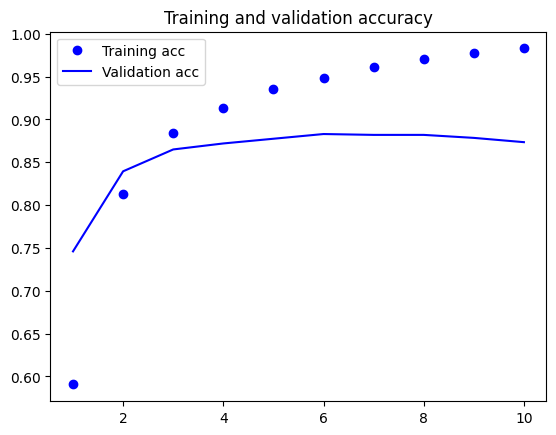

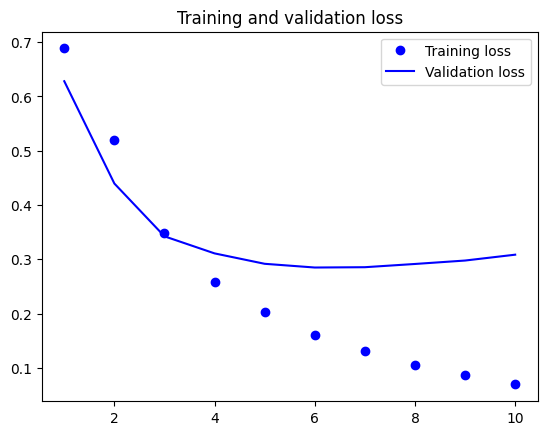

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Splitting the data into training and validation to set different sample size

In [ ]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattening the Size 
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

#Summary of the model

In [ ]:
model.summary()

#Running the model

In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=15,
                    batch_size=32,
                    validation_data=(val_texts, val_labels), 
                    callbacks=callbacks)

#Mounting google drive to read dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [6]:
import os

In [11]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  14.7M      0  0:00:05  0:00:05 --:--:-- 23.1M
^C
^C


#Reading train and test data

In [7]:
imdb_dir = '/content/drive/MyDrive/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

#Tokenizing the data

In [57]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np




maxlen = 100  # We will cut reviews after 100 words
training_samples = 10000  # We will be training on 200 samples
validation_samples =10000   # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#Pre-processing glove embeddings

In [50]:
glove_dir = '/content/drive/MyDrive/glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [51]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

#Defining the  model

In [52]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_10 (Flatten)        (None, 10000)             0         
                                                                 
 dense_18 (Dense)            (None, 32)                320032    
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#Loading GloVe embeddings and freezing embedding layer in the model

In [53]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

#Training and evaluation of the model

In [54]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 108ms/step - loss: 1.6359 - acc: 0.5100 - val_loss: 1.2851 - val_acc: 0.4800
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 0.8914 - acc: 0.5600 - val_loss: 1.2053 - val_acc: 0.4800
Epoch 3/10
4/4 [==============================] - 0s 27ms/step - loss: 0.4718 - acc: 0.7400 - val_loss: 0.7565 - val_acc: 0.4900
Epoch 4/10
4/4 [==============================] - 0s 28ms/step - loss: 0.3100 - acc: 0.9300 - val_loss: 0.9144 - val_acc: 0.4800
Epoch 5/10
4/4 [==============================] - 0s 27ms/step - loss: 0.2258 - acc: 0.9800 - val_loss: 0.9888 - val_acc: 0.5200
Epoch 6/10
4/4 [==============================] - 0s 26ms/step - loss: 0.3204 - acc: 0.8900 - val_loss: 0.7099 - val_acc: 0.5400
Epoch 7/10
4/4 [==============================] - 0s 26ms/step - loss: 0.1316 - acc: 1.0000 - val_loss: 1.5478 - val_acc: 0.4800
Epoch 8/10
4/4 [==============================] - 0s 29ms/step - loss: 0.1590 - acc: 0.9300 - va

#Plotting perfromance over time

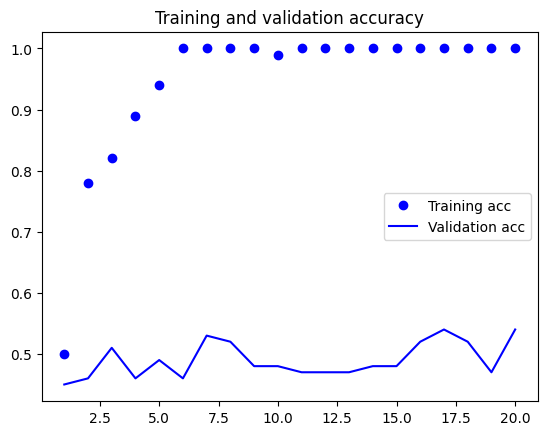

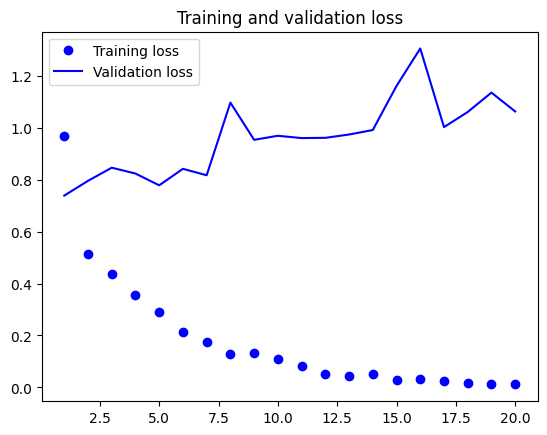

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Running the pre-trained model on test set

In [55]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [56]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7942 - acc: 0.4948


[0.7941964864730835, 0.49480000138282776]